In [516]:
# Paso 1: Preprocesamiento de datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

Cargamos el dataset


In [517]:
pokemon_df = pd.read_csv('pokemon.csv')



In [518]:
pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Aca filtramos y ordenamos las variables que ocuparemos en el dataset

In [545]:
pokemon_df_filtered = pokemon_df[pokemon_df['generation'].isin([1, 2, 3])]
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']
X = pokemon_df_filtered[features].dropna()
y = pokemon_df_filtered.loc[X.index, 'type1']


In [546]:
pokemon_df_filtered

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,['Drizzle'],1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,NaN,382,180,160,90,water,NaN,352.0,3,1
382,['Drought'],1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,383,150,90,90,ground,NaN,950.0,3,1
383,['Air Lock'],0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,NaN,384,180,100,115,dragon,flying,206.5,3,1
384,['Serene Grace'],1.0,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,...,NaN,385,100,100,100,steel,psychic,1.1,3,1


 Convertimos las variables categóricas en variables dummy
 Normalizamos las características numéricas


In [547]:
y_encoded = pd.get_dummies(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




División de los datos de entrenamiento y test


In [537]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)



Construcción de la red neuranal con 4 capas de densidad
y utilizamos el batchnormalization para poder mejorar la estabilidad del entrenamiento
usando el dropout para poder controlar el sobreajuste del entrenamiento 


In [538]:

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))



c:\Users\Cristobal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilamos el modelo con el optimizador adam ya que es de buena adaptacion  
y requiere  menos ajuste de hiperparametros y con un learning rate bajo para buscar mayor precision en el aprendizaje

In [539]:
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



Entrenamos el modelo con las 300 epochs y batch size de 10

In [548]:
history = model.fit(X_train, y_train, epochs=300, batch_size=10, validation_data=(X_test, y_test))



Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1663 - loss: 2.7150 - val_accuracy: 0.2072 - val_loss: 2.5536
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1189 - loss: 3.0372 - val_accuracy: 0.2252 - val_loss: 2.5585
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1503 - loss: 2.9942 - val_accuracy: 0.2252 - val_loss: 2.5562
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1207 - loss: 3.1472 - val_accuracy: 0.2162 - val_loss: 2.5490
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1095 - loss: 3.0668 - val_accuracy: 0.2162 - val_loss: 2.5476
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1512 - loss: 2.9337 - val_accuracy: 0.2162 - val_loss: 2.5478
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1513 - loss: 2.9018 - val_accuracy: 0.2072 - val_loss: 2.5424
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1458 - loss: 2.9807 - val_accuracy: 0.2072 - v

Evaluamos el modelo para saber su precision y cuanta perdida tuvo


In [549]:
model.evaluate(X_test, y_test)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2245 - loss: 2.3869 


[2.326319694519043, 0.22522522509098053]

Vemos el historial de los valores de precision que arrojo 

In [550]:
history.history

{'accuracy': [0.1595330685377121,
  0.13618676364421844,
  0.1595330685377121,
  0.10894941538572311,
  0.13229571282863617,
  0.13229571282863617,
  0.1595330685377121,
  0.13229571282863617,
  0.09727626293897629,
  0.13618676364421844,
  0.15564201772212982,
  0.12451361864805222,
  0.11284046620130539,
  0.13618676364421844,
  0.12062256783246994,
  0.12062256783246994,
  0.15175096690654755,
  0.15564201772212982,
  0.09338521212339401,
  0.16342411935329437,
  0.09727626293897629,
  0.1595330685377121,
  0.10116731375455856,
  0.1284046620130539,
  0.13229571282863617,
  0.15175096690654755,
  0.143968865275383,
  0.12451361864805222,
  0.13229571282863617,
  0.18287937343120575,
  0.14007781445980072,
  0.17120622098445892,
  0.143968865275383,
  0.15564201772212982,
  0.143968865275383,
  0.15175096690654755,
  0.17898832261562347,
  0.14007781445980072,
  0.17898832261562347,
  0.15175096690654755,
  0.17898832261562347,
  0.17898832261562347,
  0.1595330685377121,
  0.1478599

graficamos la perdida vs los epochs

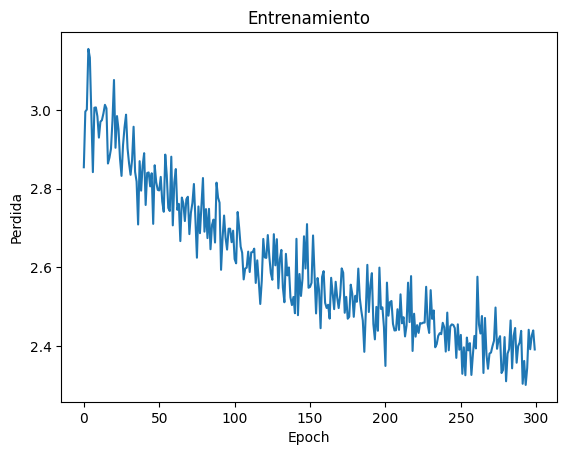

In [551]:
plt.figure()
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.title("Entrenamiento")
plt.show()

Graficamos la precision vs los epochs

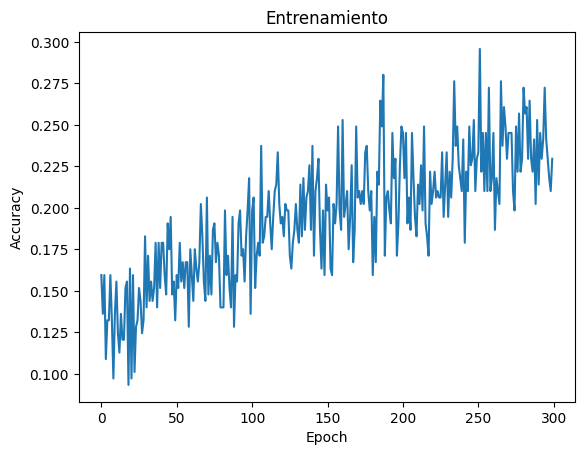

In [552]:
plt.figure()
plt.plot(history.epoch, history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Entrenamiento")
plt.show()

Imprimimos una matriz de confusión para poder analizar los datos predecidos 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


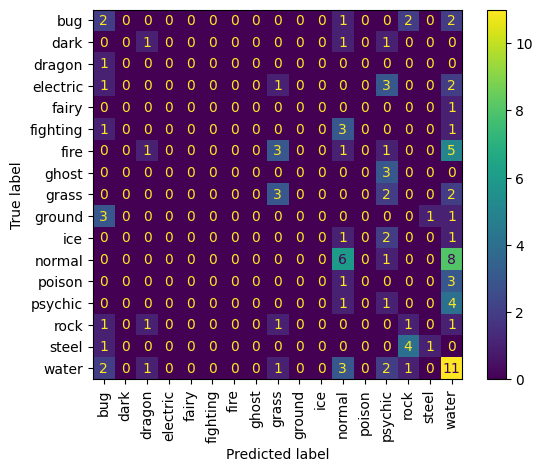

In [553]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=y_encoded.columns)
cmd.plot(xticks_rotation='vertical')
plt.show()